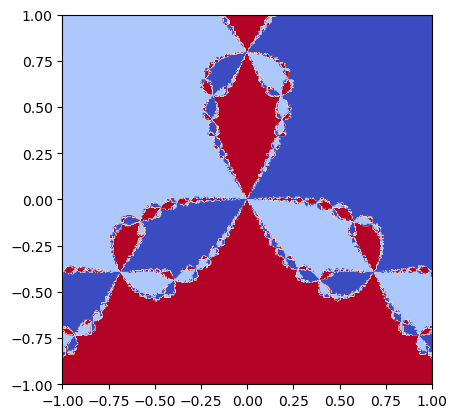

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

x = sym.Symbol("x", real= True)
y = sym.Symbol("y", real= True)
z = x + sym.I*y

f=  z**3 - 1

F = [sym.re(f), sym.im(f)]

J = np.zeros((2,2))

J0 = sym.diff(F[0], x)
J1 = sym.diff(F[0], y)
J2 = sym.diff(F[1], x)
J3 = sym.diff(F[1], y)
J = sym.Matrix( [[J0, J1], [J2, J3]])


Fn = sym.lambdify([x,y],F,"numpy")
Jn = sym.lambdify([x,y],J,"numpy")




def NewtonRaphsonG (fs, x, tolerancia= 1e-7):
    dif = 1
    
    while (dif > tolerancia) == True:
        xn = x
        j = Jn(x[0], x[1])
        ji = np.linalg.inv(j)
        f = Fn(x[0], x[1])
        x = x - np.dot(ji, f)
        dif = np.linalg.norm(xn - x) 
        
    return x

z = np.array([0.5,0.5])

N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

z0 = np.array([-1/2 , np.sqrt(3)/2])
z1 = np.array([-0.5, -(np.sqrt(3)/2)])
z2 = np.array([1, 0])

Fractal = np.zeros((N,N), np.int64)

for i in range(N):
    for j in range(N):
        raiz = NewtonRaphsonG(Fn, [x[i],y[j]])
        if np.allclose(raiz, z0):
            Fractal[i][j] = 20
        if np.allclose(raiz, z1):
            Fractal[i][j] = 100
        if np.allclose(raiz, z2):
            Fractal[i][j] = 255

plt.imshow(Fractal, cmap="coolwarm" ,extent=[-1,1,-1,1])